In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

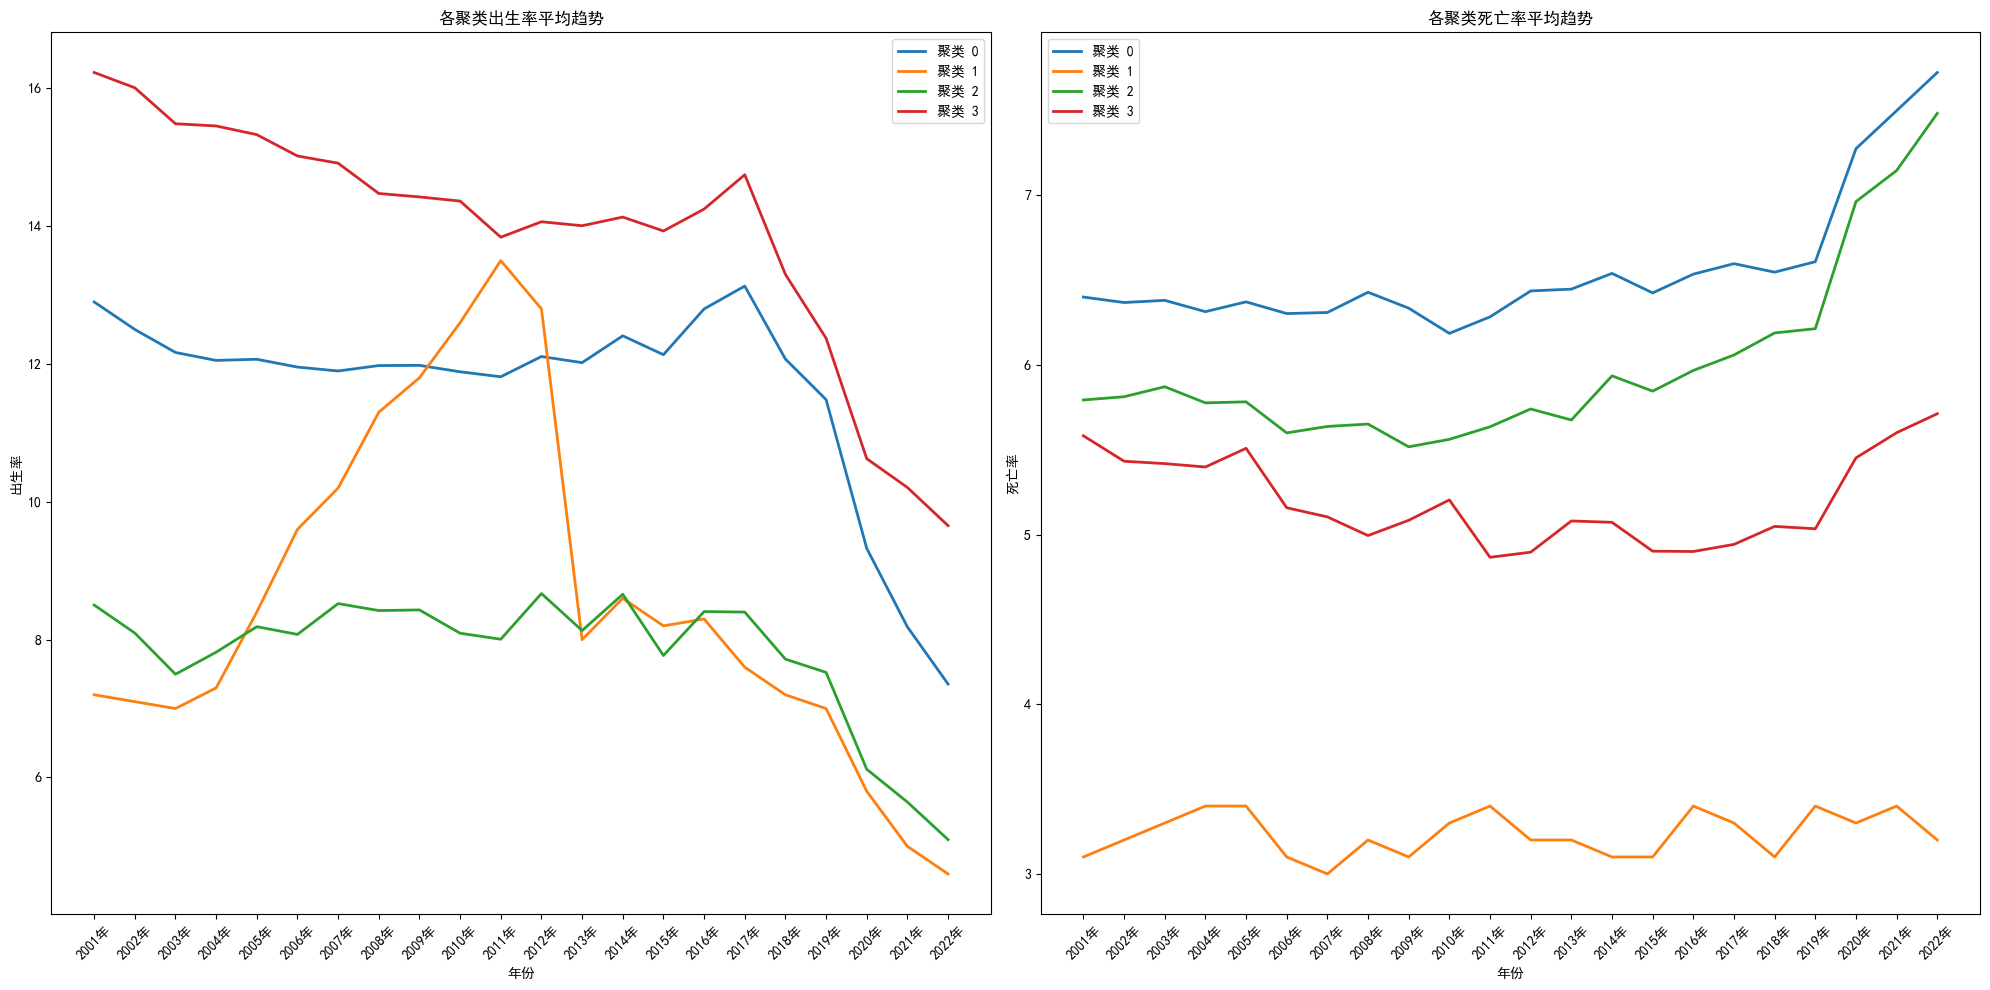


聚类 0 的省份:
包含 18 个省份：
['河北省' '山西省' '江苏省' '安徽省' '福建省' '江西省' '山东省' '河南省' '湖北省' '湖南省' '广西壮族自治区'
 '重庆市' '四川省' '贵州省' '云南省' '陕西省' '甘肃省' '青海省']

趋势特征:
出生率变化幅度: 1.42
死亡率变化幅度: 0.39
--------------------------------------------------

聚类 1 的省份:
包含 1 个省份：
['香港特别行政区']

趋势特征:
出生率变化幅度: 2.43
死亡率变化幅度: 0.13
--------------------------------------------------

聚类 2 的省份:
包含 10 个省份：
['北京市' '天津市' '内蒙古自治区' '辽宁省' '吉林省' '黑龙江省' '上海市' '浙江省' '台湾省' '澳门特别行政区']

趋势特征:
出生率变化幅度: 0.94
死亡率变化幅度: 0.52
--------------------------------------------------

聚类 3 的省份:
包含 5 个省份：
['广东省' '海南省' '西藏自治区' '宁夏回族自治区' '新疆维吾尔自治区']

趋势特征:
出生率变化幅度: 1.73
死亡率变化幅度: 0.26
--------------------------------------------------


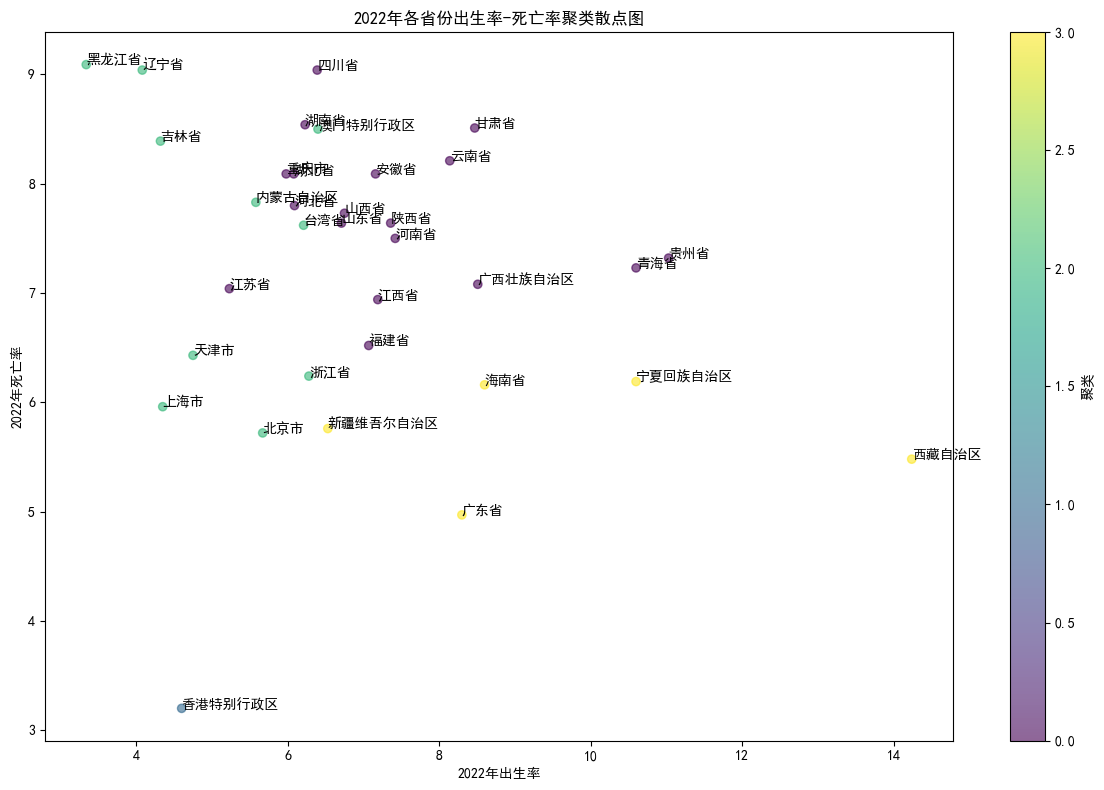

In [12]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False     

# 读取数据
birth_df = pd.read_csv('birthRateProvince.csv')
death_df = pd.read_csv('deathRateProvince.csv')

# 获取年份列
years = [str(year) + '年' for year in range(2001, 2023)]

# 提取数据
birth_data = birth_df[years].values
death_data = death_df[years].values

# 组合特征
combined_data = np.concatenate([birth_data, death_data], axis=1)

# 标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_data)

# K-means聚类
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# 绘制趋势图
plt.figure(figsize=(20, 10))

# 出生率趋势
plt.subplot(1, 2, 1)
for i in range(n_clusters):
    cluster_data = birth_data[clusters == i]
    mean_trend = np.mean(cluster_data, axis=0)
    plt.plot(years, mean_trend, linewidth=2, label=f'聚类 {i}')

plt.title('各聚类出生率平均趋势')
plt.xlabel('年份')
plt.ylabel('出生率')
plt.xticks(rotation=45)
plt.legend()

# 死亡率趋势
plt.subplot(1, 2, 2)
for i in range(n_clusters):
    cluster_data = death_data[clusters == i]
    mean_trend = np.mean(cluster_data, axis=0)
    plt.plot(years, mean_trend, linewidth=2, label=f'聚类 {i}')

plt.title('各聚类死亡率平均趋势')
plt.xlabel('年份')
plt.ylabel('死亡率')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 打印聚类结果
for i in range(n_clusters):
    print(f'\n聚类 {i} 的省份:')
    provinces = birth_df['地区'][clusters == i].values
    print(f'包含 {len(provinces)} 个省份：')
    print(provinces)
    print(f'\n趋势特征:')
    print(f'出生率变化幅度: {np.std(birth_data[clusters == i].mean(axis=0)):.2f}')
    print(f'死亡率变化幅度: {np.std(death_data[clusters == i].mean(axis=0)):.2f}')
    print('-' * 50)

# 2022年散点图
plt.figure(figsize=(12, 8))
scatter = plt.scatter(birth_data[:, -1], death_data[:, -1], 
                     c=clusters, cmap='viridis', alpha=0.6)

# 添加省份标签
for i, txt in enumerate(birth_df['地区']):
    plt.annotate(txt, (birth_data[i, -1], death_data[i, -1]))

plt.xlabel('2022年出生率')
plt.ylabel('2022年死亡率')
plt.title('2022年各省份出生率-死亡率聚类散点图')
plt.colorbar(scatter, label='聚类')
plt.tight_layout()
plt.show()